In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from math import ceil
from tqdm import tqdm

In [2]:
def atomic_eigenproblem_solver(Z, rcut, ell, npoints, deltar):
#     H = np.zeros((npoints,npoints))
#     for m in range(npoints):
#         r = (m+1)*delta_r
#         if (r >= rcut): H[m,m] = (1/(delta_r*delta_r))-(Z/r)+(ell*(ell+1)/2/(r*r))
#         else: H[m,m]= (1/(delta_r*delta_r)) - (Z/rcut) + (ell*(ell+1)/2/(r*r))
#         if (m < npoints - 1): H[m, m + 1] = -0.5/(delta_r*delta_r)
#         if (m > 0): H[m,m-1]= -0.5/(delta_r*delta_r)
#     eigvals, eigvecs = np.linalg.eig(H)
#     eigvals = np.real(eigvals)
#     index = eigvals.argsort()
#     eigvals = eigvals[index]
#     eigvecs = eigvecs[:,index]
#     return eigvals, eigvecs
    H = np.zeros((npoints,npoints))
    for m in range(npoints):
        r = (m+1)*deltar
        if(r>=rcut):
            H[m,m]=1./deltar**2-Z/r+ell*(ell+1)/2./r**2
        else:
            H[m,m]=1./deltar**2-Z/rcut+ell*(ell+1)/2./r**2
        if(m<npoints-1):
            H[m,m+1]=-0.5/deltar**2
        if(m>0):
            H[m,m-1]=-0.5/deltar**2
    evals, evecs = np.linalg.eig(H)
    idx = evals.argsort()
    evals = evals[idx]
    evecs = evecs[:,idx]
    return evals,evecs

## Problem 1 Part 1

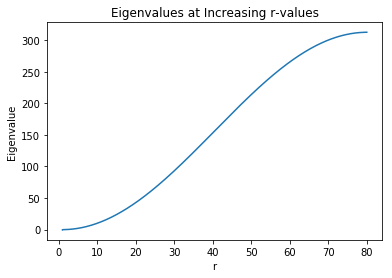

Eigenvalue: 0: -0.499202549806
Eigenvalue: 1: -0.12495003996
Eigenvalue: 2: -0.0555456825224


In [56]:
npoints=1000
deltar=0.08
rcut=0
Z=1
ell=0

eigenvals,eigenvecs = atomic_eigenproblem_solver(Z,rcut,ell,npoints,deltar)
fig,ax = plt.subplots()
r = np.linspace(1,npoints*deltar,npoints)
ax.plot(r, eigenvals)
ax.set_xlabel("r")
ax.set_ylabel("Eigenvalue")
ax.set_title("Eigenvalues at Increasing r-values")
plt.show()
#Lowest three eigenvalues
for i in range(3): print("Eigenvalue: {}: {}".format(i,eigenvals[i]))


We now need to show that the above lowest eigenvalues agree with those of the hydrogen spectra:
E(n) = - $\frac{Z^2}{2n^2}$ in Hartrees. 

n = 1: -0.5 predicted, -0.499 seen (close agreement)

n = 2: -1/8 $\approx$ -0.125 predicted, -0.1249 seen (close agreement)

n = 3: -1/18 $\approx$ -0.05555 predicted, -0.05554 seen (close agreement). 

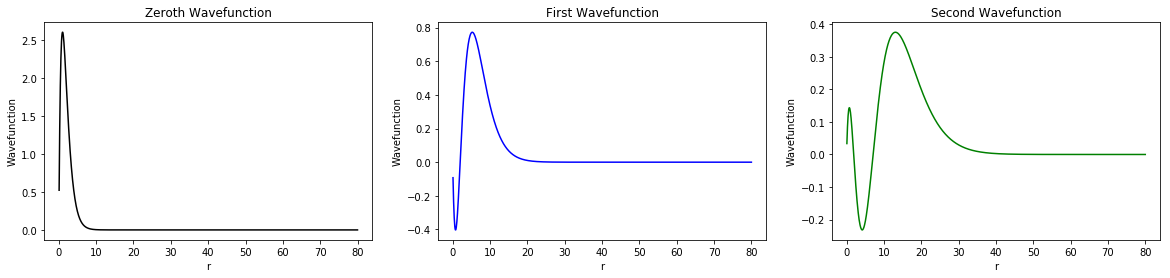

In [4]:
#Lowest Three Wavefunctions
fig, ax = plt.subplots(ncols = 3, figsize = (20,4))
r = np.linspace(0.08,npoints*deltar,npoints)
ax1, ax2, ax3 = ax.flatten()
wave_func = eigenvecs/r
ax1.plot(r, wave_func[:,0], "k")
ax1.set_xlabel("r")
ax1.set_ylabel("Wavefunction")
ax1.set_title("Zeroth Wavefunction")
ax2.plot(r, wave_func[:,1], "b")
ax2.set_xlabel("r")
ax2.set_ylabel("Wavefunction")
ax2.set_title("First Wavefunction")
ax3.plot(r, wave_func[:,2], "g")
ax3.set_xlabel("r")
ax3.set_ylabel("Wavefunction")
ax3.set_title("Second Wavefunction")
plt.show()

Nodes are seen above as the critical points, so we see 1, 2 and 3 nodes respectively for the zeroth, first, and second eigenstates, as desired. 

## Problem 1 Part 2

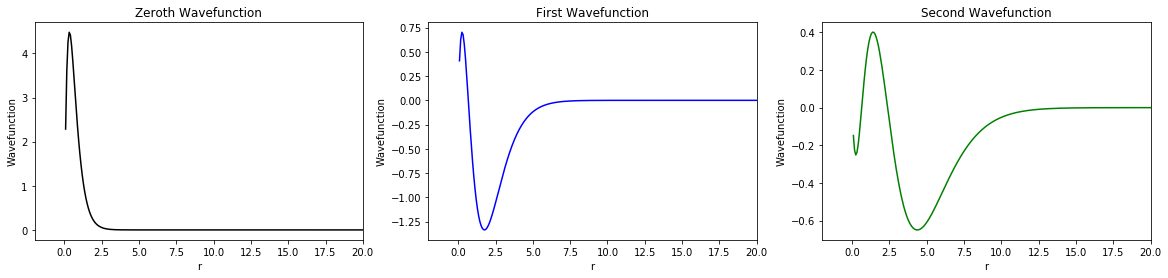

In [9]:
Z = 3
npoints=1000
deltar=0.08
rcut=0
ell=0
eigenvals,eigenvecs = atomic_eigenproblem_solver(Z,rcut,ell,npoints,deltar)
#Lowest Three Wavefunctions
fig, ax = plt.subplots(ncols = 3, figsize = (20,4))
r = np.linspace(0.08,npoints*deltar,npoints)
ax1, ax2, ax3 = ax.flatten()
ax1.set_xlim((-2,20))
ax2.set_xlim((-2,20))
ax3.set_xlim((-2,20))
#wave_func = np.real(eigenvecs)/r
wave_func = eigenvecs/r
ax1.plot(r, wave_func[:,0], "k")
ax1.set_xlabel("r")
ax1.set_ylabel("Wavefunction")
ax1.set_title("Zeroth Wavefunction")
ax2.plot(r, wave_func[:,1], "b")
ax2.set_xlabel("r")
ax2.set_ylabel("Wavefunction")
ax2.set_title("First Wavefunction")
ax3.plot(r, wave_func[:,2], "g")
ax3.set_xlabel("r")
ax3.set_ylabel("Wavefunction")
ax3.set_title("Second Wavefunction")
plt.show()

The structure (including number of nodes) stays very similar to the lowest eigenstate of Hydrogen, but now we see a general deepening of the wavefunction: before the range was from -0.12 or so to 0 and for Lithium we see a range close to -0.3 to 0, and also a tightening of the potential well, becoming more tightly localized as expected per the explanation in the problem statement. 

# Problem 1 Part 3

We want to ensure that rc isn’t much bigger than than half the distance between atoms to satisfy the latter constraint.
Make a plot of the lowest 5 eigenvalues of the radial wave equation for values of rc ranging from zero to 3 atomic units. Determine a value of rc such that the lowest eigenvalue is within 10−2 Hartrees of the 2nd lowest eigenvalue of the full Coulomb potential.

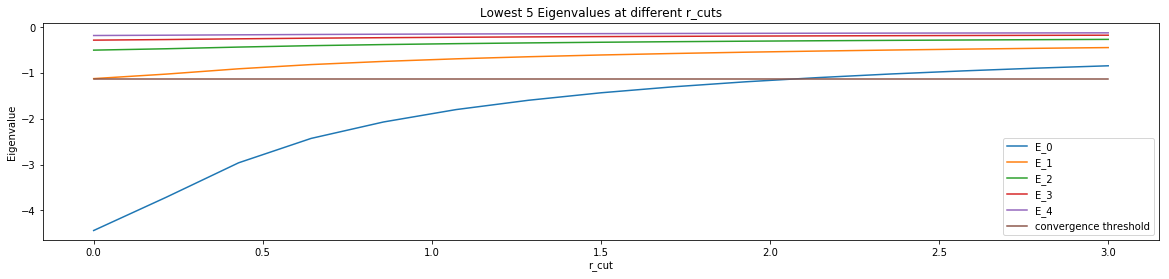

In [6]:
Z = 3
npoints=1000
deltar=0.08
ell=0
eigenvalue_list = []
for i in range(15):
    rcut = 0.2*i
    eigenvals = atomic_eigenproblem_solver(Z,rcut,ell,npoints,deltar)[0]
    eigenvalue_list.append(eigenvals[:5])
fig,ax = plt.subplots(figsize = (20,4))
r = np.linspace(0,3,15)
eigenvalue_array = np.array(eigenvalue_list)
threshold= np.ones(15)*(eigenvalue_array[0,1] - 10**(-2))
for i in range(5):
    ax.plot(r, eigenvalue_array[:,i], label = "E_" + str(i))
ax.plot(r,threshold, label = "convergence threshold")
ax.legend()
ax.set_xlabel("r_cut")
ax.set_ylabel("Eigenvalue")
ax.set_title("Lowest 5 Eigenvalues at different r_cuts")
plt.show()

We see from the above plot, that the lowest eigenvalue crosses the convergence threshold line at roughly r_cut = 2.1, so we will set r_cut to this value going forward. 

## Problem 1 Part 4

In [22]:
Z = 3
npoints=1000
deltar=0.08
ell=0
rcut = 0
r = np.linspace(0.08,npoints*deltar,npoints)
vals, eigstate_full =  atomic_eigenproblem_solver(Z,rcut,ell,npoints,deltar)
wave_func1 = eigstate_full/r
two_s_eigstate_full = wave_func1[:,1]

#Now change r_cut to 2.1 as found above:
rcut = 2.1
pseudo_vals, pseudo_states = atomic_eigenproblem_solver(Z, rcut, ell, npoints, deltar)
wave_func2 = pseudo_states/r
one_s_eigstate_pseudo = wave_func2[:,0]

(1000,)


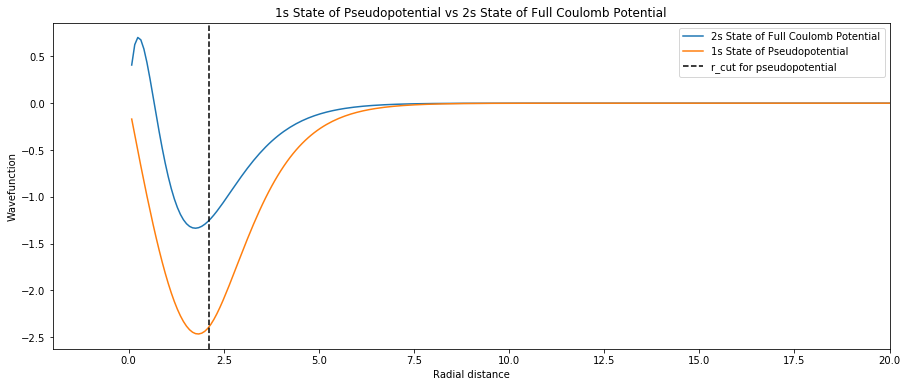

In [23]:
fig, ax = plt.subplots(figsize = (15,6))
ax.plot(r, two_s_eigstate_full, label = "2s State of Full Coulomb Potential")
ax.plot(r, one_s_eigstate_pseudo, label = "1s State of Pseudopotential")
plt.axvline(x=2.1, color='k', linestyle='--', label = "r_cut for pseudopotential" )
ax.legend()
ax.set_xlim((-2,20))
ax.set_xlabel("Radial distance")
ax.set_ylabel("Wavefunction")
ax.set_title("1s State of Pseudopotential vs 2s State of Full Coulomb Potential")
plt.show()

## Problem 1 Part 5
Set l = 1 and compare the lowest energy eigenvalues of your pseudopotential and the full Coulomb potential. These should be equivalent if the pseudopotential does a good job describing the 2p states. Is the performance of your pseudopotential acceptable? Acceptable deviations here are under 0.1 eV.

In [3]:
Z = 3
npoints=1000
deltar=0.08
ell=1
rcut = 0
full_vals = atomic_eigenproblem_solver(Z,rcut,ell,npoints,deltar)[0]
rcut = 2.1
pseudo_vals = atomic_eigenproblem_solver(Z,rcut,ell,npoints,deltar)[0]
print("Full: {}".format(str(full_vals[:3])))
print("Pseudo: {}".format(str(pseudo_vals[:3])))



Full: [-1.12636193 -0.50062709 -0.28157295]
Pseudo: [-0.74688494 -0.37431908 -0.2252615 ]


0.1 eV is approximately 0.00367493 Hartrees, so no, our pseudopotential is not acceptable here. 

## Problem 1 Part 6

In [4]:
def pseudo(G): 
    factor = -4*3.14*Z/rcut
    pot = np.sin(G*rcut)/(G**3)
    return factor * pot

In [5]:
def coul(G):
    factor = -4*3.14*Z
    return factor/(G*G)

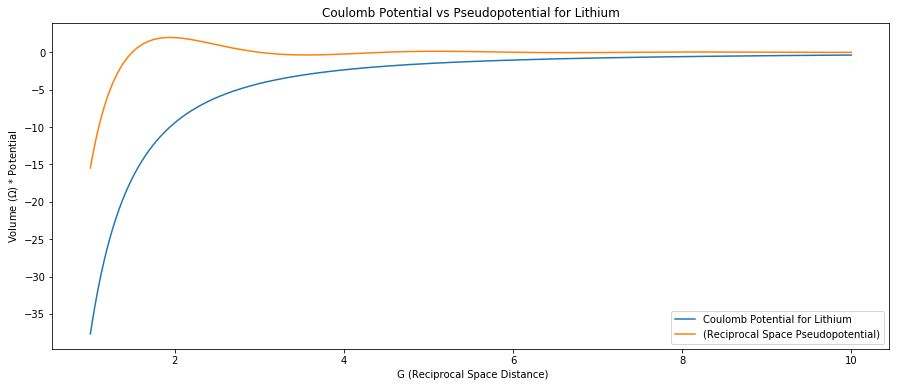

In [6]:
fig, ax = plt.subplots(figsize = (15,6))
vol = 1
G = np.linspace(1,10,1000)
ax.plot(G, coul(G), label = "Coulomb Potential for Lithium")
ax.plot(G, pseudo(G), label = "(Reciprocal Space Pseudopotential)")
ax.legend()
ax.set_xlabel(" G (Reciprocal Space Distance)")
ax.set_ylabel("Volume ($\Omega$) * Potential")
ax.set_title("Coulomb Potential vs Pseudopotential for Lithium")
plt.show()

## Problem 1 Part 7

In [8]:
h_bar = 1
m = 1
e = 1
rcut = 2.1
# use atomic units: electron mass = 1, h_bar = 1, e (electron charge) = 1
# atomic units of energy are Hatrees = 27.2 eV
# atomic units of distance are Bohr = 0.529177e-10 m = 0.529177 Angstroms

ecut = 40 #plane wave cutoff energy (Hartrees)
bcc_conventional_cell_lattice_constant = 6.6 # (Bohr)
num_kvecs = 30 #number of points to compute bands

#Define lattice vectors
a1 = np.array([-0.5, 0.5, 0.5]) * bcc_conventional_cell_lattice_constant
a2 = np.array([0.5, -0.5, 0.5]) * bcc_conventional_cell_lattice_constant
a3 = np.array([0.5, 0.5, -0.5]) * bcc_conventional_cell_lattice_constant

#Define reciprocal lattice vectors
vol = np.dot(a1,np.cross(a2, a3))
b1 = 2*3.14*np.cross(a2,a3)/vol
b2 = 2*3.14*np.cross(a3,a1)/vol
b3 = 2*3.14*np.cross(a1,a2)/vol


In [9]:
def get_plane_waves(b1, b2, b3, ecut):
    #find the integral linear combinations of recip. lattice vecs with
    #electron free particle energy less than ecut
    max_val = int(ceil(np.sqrt(ecut)/(np.linalg.norm(b1))/np.sqrt(2)))
    plane_waves = []
    num_plane_waves = 0
    for i in range(-max_val, max_val + 1):
        for j in range(-max_val, max_val + 1):
            for k in range(-max_val, max_val + 1):
                if (1/2 * (np.linalg.norm(i * b1 + j * b2 + k * b3))**2 <  ecut):
                    num_plane_waves += 1
                    plane_waves.append(i*b1+j*b2+k*b3)
    print(num_plane_waves)
    return np.array(plane_waves), num_plane_waves

In [7]:
ecut = 40.0
get_plane_waves(b1,b2,b3,ecut)

671


(array([[-2.85454545, -2.85454545, -7.61212121],
        [-1.9030303 , -1.9030303 , -7.61212121],
        [-0.95151515, -0.95151515, -7.61212121],
        ...,
        [ 0.95151515,  0.95151515,  7.61212121],
        [ 1.9030303 ,  1.9030303 ,  7.61212121],
        [ 2.85454545,  2.85454545,  7.61212121]]), 671)

In [22]:
def eig_array(plane_waves, num_plane_waves):
    #define k-points where bands will be computed
    #from gamma to L for bcc crystal
    k_vecs = []
    for i in range(num_kvecs):
        k_vecs.append(float(i)/(num_kvecs-1)/2 * b1 + float(i)/(num_kvecs-1)/2 * b2 + float(i)/(num_kvecs-1)/2 * b3)
    k_vecs = np.array(k_vecs)
    #form the potential part of the Hamiltonian
    #H_pot = np.zeros((num_plane_waves,num_plane_waves)) #free electron case
    H_pot = lithium_atom_pot(plane_waves,num_plane_waves,b1,b2,b3,vol) #lithium atom case

    #loop over k vecs along gamma to L
    eigval_array = []
    it = 0
    for k_vec in k_vecs:
        #print(it)
        it += 1
        #form the kinetic part of the Hamiltonian here
        H_kin = h_bar**2/(2*m) * np.diag(np.square(np.linalg.norm(k_vec - plane_waves, axis = 1)))
        H = H_kin + H_pot
        #compute the eigenvalues here
        eigval_array.append(np.sort(np.linalg.eigvals(H)))
        #eigval_array.append(np.linalg.eigvals(H - np.identity(len(H))*10000).sort() + 10000)
    return 27.2 * np.array(eigval_array), k_vecs

In [11]:
def lithium_atom_pot(plane_waves, num_plane_waves, b1, b2, b3, vol):
    factor = -3*4*3.14*e**2/vol
    H_pot = np.zeros((num_plane_waves, num_plane_waves))
    for i in tqdm(range(num_plane_waves)):
        for j in range(i, num_plane_waves):
            if i == j : continue
            H_pot[i,j] = 1/(np.linalg.norm(plane_waves[i] - plane_waves[j]))**2
            #H_pot[j,i] = H_pot[i,j]
    H_pot += H_pot.T
    return factor*H_pot

In [11]:
plane_waves,num_plane_waves = get_plane_waves(b1,b2,b3,ecut)
eigval_array, k_vecs = eig_array(plane_waves, num_plane_waves)

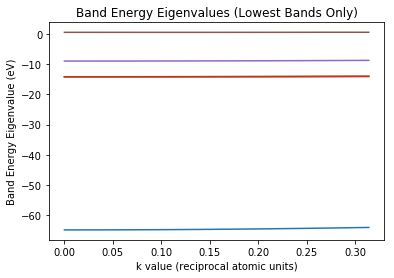

In [12]:
fig,ax = plt.subplots()
eig_cut = 5
ax.plot(k_vecs[:,0], np.real(eigval_array[:,0:eig_cut + 1]))
ax.set_xlabel("k value (reciprocal atomic units)")
ax.set_ylabel("Band Energy Eigenvalue (eV)")
ax.set_title("Band Energy Eigenvalues (Lowest Bands Only)")
plt.show()

The lowest energy bands look very flat as expected.

## Problem 1 Part 8

In [12]:
def pseudo_pot(plane_waves, num_plane_waves, b1, b2, b3, vol):
    factor = -3*4*3.14*e**2/vol/rcut
    H_pot = np.zeros((num_plane_waves, num_plane_waves))
    for i in range(num_plane_waves):
        for j in range(i, num_plane_waves):
            if i == j : continue
            H_pot[i,j] = np.sin((np.linalg.norm(plane_waves[i] - plane_waves[j]))*rcut)/(np.linalg.norm(plane_waves[i] - plane_waves[j]))**3
            #H_pot[j,i] = H_pot[i,j]
    H_pot += H_pot.T
    return factor*H_pot

In [13]:
def eig_array_pseudo(plane_waves, num_plane_waves):
    #define k-points where bands will be computed
    #from gamma to L for fcc crystal
    k_vecs = []
    for i in range(num_kvecs):
        k_vecs.append(float(i)/(num_kvecs-1)/2 * b1 + float(i)/(num_kvecs-1)/2 * b2 + float(i)/(num_kvecs-1)/2 * b3)
    k_vecs = np.array(k_vecs)

    #form the potential part of the Hamiltonian
    #H_pot = np.zeros((num_plane_waves,num_plane_waves)) #free electron case
    H_pot = pseudo_pot(plane_waves,num_plane_waves,b1,b2,b3,vol) #pseudopotential

    #loop over k vecs along gamma to L
    eigval_array = []
    it = 0
    for k_vec in k_vecs:
        #print(it)
        it += 1
        #form the kinetic part of the Hamiltonian here
        H_kin = h_bar**2/(2*m) * np.diag(np.square(np.linalg.norm(k_vec - plane_waves, axis = 1)))
        H = H_kin + H_pot
        #compute the eigenvalues here
        eigval_array.append(np.sort(np.linalg.eigvals(H)))
        #eigval_array.append(np.linalg.eigvals(H - np.identity(len(H))*10000).sort() + 10000)
    return 27.2* np.array(eigval_array), k_vecs

In [16]:
ecut_vec = []
coul_band_one = []
coul_band_two = []
pseudo_band = []
for ecut in tqdm(range(1, 6)):
    ecut_vec.append(ecut)
    plane_waves,num_plane_waves = get_plane_waves(b1,b2,b3,ecut)
    eigval_array, k_vecs = eig_array(plane_waves, num_plane_waves)
    coul_band_one.append(eigval_array[0,0])
    coul_band_two.append(eigval_array[0,1])
    eigval_array_pseudo, k_vecs_pseudo = eig_array_pseudo(plane_waves, num_plane_waves)
    pseudo_band.append(eigval_array_pseudo[0,0])

100%|██████████| 5/5 [02:39<00:00, 40.36s/it]


/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


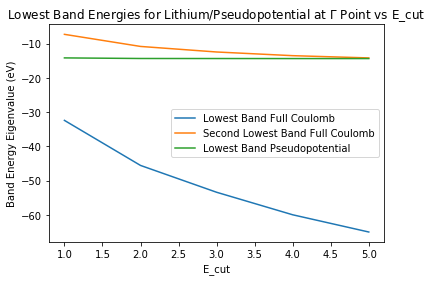

In [17]:
fig,ax = plt.subplots()
ax.plot(ecut_vec, coul_band_one, label = "Lowest Band Full Coulomb")
ax.plot(ecut_vec, coul_band_two, label = "Second Lowest Band Full Coulomb")
ax.plot(ecut_vec, pseudo_band, label = "Lowest Band Pseudopotential")
ax.set_xlabel("E_cut")
ax.set_ylabel("Band Energy Eigenvalue (eV)")
ax.legend()
ax.set_title("Lowest Band Energies for Lithium/Pseudopotential at $\Gamma$ Point vs E_cut")
plt.show()

## Problem 1 Part 9

In [23]:
# bcc_conventional_cell_lattice_constant = 6.6 # (Bohr)
# num_kvecs = 30 #number of points to compute bands
# ecut = 40 # for convergence
plane_waves,num_plane_waves = get_plane_waves(b1,b2,b3,ecut)
eigval_array, k_vecs = eig_array(plane_waves, num_plane_waves)# to get lowest 2 full coulomb bands
eigval_array_pseudo, k_vecs_pseudo = eig_array_pseudo(plane_waves, num_plane_waves) # to get lowest pseudo band
full_one = eigval_array[:,0]
full_two = eigval_array[:,1]
pseudo = eigval_array_pseudo[:,0]

  2%|▏         | 13/671 [00:00<00:05, 127.93it/s]

671


100%|██████████| 671/671 [00:01<00:00, 462.74it/s]


/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


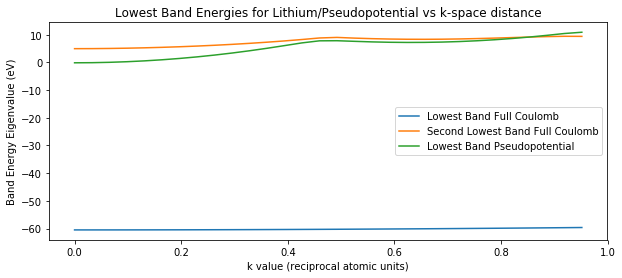

In [24]:
fig,ax = plt.subplots(figsize = (10,4))
ax.plot(k_vecs[:,0], full_one, label = "Lowest Band Full Coulomb")
ax.plot(k_vecs[:,0], full_two, label = "Second Lowest Band Full Coulomb")
ax.plot(k_vecs_pseudo[:,0], pseudo, label = "Lowest Band Pseudopotential")
ax.set_xlabel("k value (reciprocal atomic units)")
ax.set_ylabel("Band Energy Eigenvalue (eV)")
ax.legend()
ax.set_title("Lowest Band Energies for Lithium/Pseudopotential vs k-space distance")
plt.show()

The bands compare well in general shape but there appears to be a vertical offset between the pseudopotential and 
the second lowest band of the full potential. One effect we are neglecting that could give rise to these differences is electron-electron interactions. Introducing a more complicated pseudopotential at the cost of computational speed to include these effects could improve the agreement. 

## Problem 1 Part 10

In [17]:
bcc_conventional_cell_lattice_constant = 6.6 # (Bohr)
num_kvecs = 30 #number of points to compute bands
ecut = 40 # for convergence
plane_waves,num_plane_waves = get_plane_waves(b1,b2,b3,ecut)
eigval_array, k_vecs = eig_array(plane_waves, num_plane_waves)# to get lowest 2 full coulomb bands
full_one = eigval_array[:,0]
full_two = eigval_array[:,1] 

671


/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


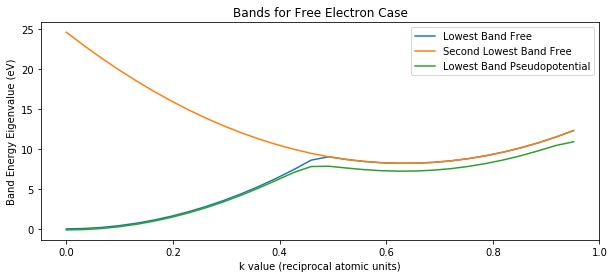

In [21]:
fig,ax = plt.subplots(figsize = (10,4))
ax.plot(k_vecs[:,0], full_one, label = "Lowest Band Free")
ax.plot(k_vecs[:,0], full_two, label = "Second Lowest Band Free")
ax.plot(k_vecs_pseudo[:,0], pseudo, label = "Lowest Band Pseudopotential")
ax.set_xlabel("k value (reciprocal atomic units)")
ax.set_ylabel("Band Energy Eigenvalue (eV)")
ax.legend()
ax.set_title("Bands for Free Electron Case")
plt.show()

We see decent agreement between the pseudopotential lowest state and the free electron lowest state as seen in the plot above in both structure and scale. This allows us to conclude that solid lithium has a high conductivity since the electrons behave almost freely and can thus move through the material very well.

## Problem 1 Part 11

The pseudopotential we developed gives rise to sharp features based on the rcut value introduced. Based on Pauli Exclusion Principle, even if third electrons are present around the sharp features in the valence band, the electron must hop to another band despite an energy cost to obey antisymmetrization requirements for fermions. These transitions between bands through potential barriers give the electrons the characteristics of the free electrons without a potential as seen above, making the 2s orbital a conduction band. 

## Problem 3 
| E_cutoff | K-Points | Total Energy (Ry) |
|----------|-------------------|----------------------|
| 30       | 4x4x1      | -22.79232114              |
| 30        | 6x6x1     | -22.78695380              |
| 30       | 8x8x1      | -22.78987757              |
| 30       | 10x10x1 |  -22.79025350 |
| 35       |  10x10x1| -22.79034665 | 
| 35       |  12x12x1|   -22.78979044|
| 40       | 10x10x1  | -22.79074047            |
| 40       | 11x11x1      |  -22.79045000               |


Thus we see that after 10x10x1 K-point mesh and an E-cut of 40 Ry, the total energy converges to roughly within 0.01 rV (~0.0003 Ry). We will use an 11x11x1 point mesh here. 

## Problem 4 Part 1

Using the K-mesh and E-cut determined above to start:

| c (a.u.) | Total Energy (Ry) |
|----------|-------------------|
|   18.6  |  -22.79074047    |
|  20.93   | -22.79043425    |
|     23.25  |  -22.79042112   |
After an increase of celldm(3) to 5, we see a convergence to within 0.01 eV in total energy. This value is roughly 12.3 Angstrom, so here we will use a c value of 15.3 Angstrom as stated in the problem. This corresponds to 28.9 a.u., meaning we set celldm(3) = 6.22.  

## Problem 4 Part 2

| a (a.u.) | Total Energy (Ry) | Pressure (kbar)|
|----------|-------------------|-----------------|
|   4.65  |      -22.79039683 |  0.72 |
| 5.15   | -22.70379030  | -104.64 |
|   4.15  |  -22.63507662   | 373.44|
| 4.5 | -22.77858406| 71.32|
| 4.75|  -22.78635954| -33.59|
| 4.64|  -22.79036248| 2.92|
| 4.66|  -22.79038605 |  -3.11|
|10 |-21.6558525 |-6.81 |

Turns out we were at the minimum to start with! Converting the experimental value of 2.46 Angstroms to a.u. we see roughly 4.648, in very close agreement with the value of 4.65 that we found above. 

## Problem 4 Part 3

Unlike the interatomic (LJ) potentials covered earlier, we do not specifically set sigma, eps, etc to determine the lattice constant pre-computation, but rather rely fully on the computational model to determine the enery and stress fully based on the lattice constant we give it. Therefore the lattice constant for the minima found above is a prediction of the computational method. 

## Problem 4 Part 4
We would suspect dipole moments at play for values of the parameter c being small enough such that we have fully periodic BC’s. In this case the planes will interact with each other via their dipoles and produce these fictitious electric fields discussed above, which can alter the energetics.

## Problem 5 Part 1

We are using a PBE exchange-correlation functional from the file "C.pbe-rrkjus.UPF" in the pseudo directory.  

## Problem 5 Part 3

As per table 6.1 shown in lecture 14 of the course, we note that LDA includes the density parameter only while PBE (a subset of GGA) includes both density and gradient of density parameters, therefore PBE is a more accurate exchange-correlation functional. Therefore, for the LDA exchange-correlation functional we would expect a faster convergence since fewer physical attributes are quantified (hence less accuracy). Therefore we expect a lower plane wave cutoff needed. 

## Problem 5 Part 4
Using the parameters from before we find a $P_{XX}$ of -24.19 kbar. This is not an acceptably small stress compared to values we found previously, so we will adjust the lattice parameter. 

| a (a.u.) | Total Energy (Ry) | $P_{XX}$ (kbar)|
|----------|-------------------|-----------------|
|   4.65  |      -22.85323075 |  -24.19 |
| 4.70   | -22.85028311  | -50.19 |
|   4.60 |  -22.85393444   |  5.34|
| 4.59 | -22.85379237| 11.68|
| 4.61|   -22.85398273| -0.86|
| 4.62|  -22.85393389| -6.93|

Therefore we see our new lattice constant for optimal energy and stress is 4.61 a.u. = 2.439 Angstrom, slightly smaller than the experimental lattice constant of 2.46 Angstroms, but still in close agreement. 

## Problem 5 Part 5

As discussed in Part 3 above,  LDA includes the density parameter only while PBE (a subset of GGA) includes both density and gradient of density parameters, therefore PBE is a more accurate exchange-correlation functional in this case. 

## Problem 6 Part 1

| E_cut (Ry) | Total Energy (Ry) |
|----------|-------------------|
|    40  |   -22.78584025   |
|     45|   -22.80101506 |
|    50 |    -22.80685175 |
| 55|-22.80858574 |
| 60| -22.80914189|
| 65| -22.80942649|

From above we see convergence in the total energy to within 0.01 eV with an E_cut of 65 Ry. 

## Problem 6 Part 2

For the same energy cutoff, the norm-conserving potential and the ultrasoft potential take roughly the same amount of time (~1 minute). However, the norm-conserving potential requires a much higher energy cutoff (~65 Ry as seen above), and thus the computational time is quite higher (multiple minutes in my case). 

## Problem 7 Part 4
<img src="bands.png" alt="Graphene Band Structure">

## Problem 8 Part 2
C-H bond length: 2.14 a.u. = 1.13 Angstrom. 

## Problem 8 Part 3
$P_{XX}$ = 86.19 kbars. The reason for this high stress is that the bond length between carbons simulated too small relative to the true length. This is because we used the c-c bond length from graphene for our graphane simulation, but in graphene, the carbons are double bonded and have a shorted bond length than the singly bonded graphane carbons. 

## Problem 8 Part 4 

 total energy      =     -25.17257614 Ry

## Problem 8 Part 5


For h2 formation:

total energy   =    -2.32078535 Ry

∆E ≈ E_graphane − (E_graphene + E_H2 ), using the values from calculations above: 
E_graphane (zero stress) = -25.17257614 Ry
E_graphene =  -22.80942649 Ry
E_H2 = -2.32078535 Ry
Therefore, the formation energy is given by:

∆E ≈ -0.0423643 Ry. A negative value, showing that it is energetically favorable for graphane to form. Therefore we see that graphane is stable. 

## Problem 8 Part 6

If graphane is heated up beyond a critical temperature, we could drive the reverse reaction and split the graphane into graphene and gaseous Hydrogen that we could use for a variety of applications, which is why graphane could be a storage material for Hydrogen. 